# <center>Instabot-2<br>Utkarsh Maheshwari

In [20]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import ElementClickInterceptedException
import numpy as np
from datetime import date 
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
driver =  webdriver.Chrome('/Users/utkar/Webdriver2/chromedriver')
driver.maximize_window()

In [22]:
driver.get('https://www.instagram.com/')

In [23]:
uname = 'utkarsh.mah98'
pwd = 'utkarsh98'

### Some Function from insatbot-1

In [24]:
def login(uname, pwd):
    text = driver.find_element_by_name('username')
    text.send_keys(uname)
    text = driver.find_element_by_name('password')
    text.send_keys(pwd)
    bt = driver.find_element_by_xpath('//button[contains(@class,"L3NKy")]')
    bt.click()

In [25]:
def search_item(category):
    temp = []
    que = driver.find_element_by_class_name('XTCLo')
    que.clear()
    que.send_keys(category)
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('Ap253')
    for i in results:
        acc = i.text
        if acc[0] != '#':
            temp.append(acc)  
    return temp

In [26]:
def open_profile(profile_name):
    driver.get('https://www.instagram.com/'+profile_name)

In [27]:
login(uname , pwd)

# (Q1) Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

In [29]:
food_acc = search_item('food')
food_acc

['foodtalkindia',
 'dilsefoodie',
 'foodie_incarnate',
 'foodnetwork',
 'yourfoodlab',
 'food_gambler',
 'food',
 'food_lover_journey',
 'foodchoiceofmumbai',
 'foodtravelstories',
 'foodyfetish',
 'ndtv_food',
 'thefoodattacker',
 'hangouts.co.in',
 'foodietraveller_doctor',
 'foodvoyagerindia',
 'food__junction',
 'food_story_on',
 'iamdatingfood',
 'food.hangover_',
 'food._.eater._',
 'khau_gali_foodie',
 'foodpartner22',
 'dillifoodies',
 'food.prints.lovers',
 'thatfoodfeed',
 'foodypoonam',
 'geetasfoodielife',
 'thefoodieparadise__',
 'glassofwineforme',
 'food_mandi',
 'foodvillaaa',
 'experimentsofficial',
 'hmm_nikhil',
 'foodkars',
 'thatdelhifoodie',
 'good_food_stuff',
 'foodcity__2020',
 'foodflavoursforever',
 'foodie_guy101',
 'punefoodiesoul',
 'food_mood_forlife',
 'foodzaara',
 'foodie_delhiboy',
 'delhifoodnest',
 'food_makesmymood',
 'delhi_streets_food',
 'foodies_tales',
 'thegreatindianfoodie',
 'foodnetworkasia',
 'streetfoodrecipe',
 'Horn Ok Please - Food Tr

### From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [31]:
# this function will return the followers of top 10 handles obtained by seraching food
def get_total_followers(food_acc):
    mk={}
    for j in range(10):
        i=food_acc[j]
        open_profile(i)
        wait = WebDriverWait(driver ,10)
        ans = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'g47SY')))
        foll = ans[1]
        f = foll.get_attribute('title')
        mk[i] = int(f.replace(',',''))
    return mk

In [32]:
mk = get_total_followers(food_acc)
mk

{'foodtalkindia': 295357,
 'dilsefoodie': 444188,
 'foodie_incarnate': 184103,
 'foodnetwork': 10303597,
 'yourfoodlab': 1150204,
 'food_gambler': 90973,
 'food': 28984,
 'food_lover_journey': 13564,
 'foodchoiceofmumbai': 53485,
 'foodtravelstories': 164016}

In [33]:
#  sort the dictionary and print top 5 handles with most followers
mk_top = sorted(mk.items(), key=lambda x: x[1], reverse=True)
print("top 5 accounts based on number of followers are:")
for i in range(5):
    print(mk_top[i][0] ,mk_top[i][1])

top 5 accounts based on number of followers are:
foodnetwork 10303597
yourfoodlab 1150204
dilsefoodie 444188
foodtalkindia 295357
foodie_incarnate 184103


In [34]:
acc_fol = mk_top[0:5]
acc_followers = {}
for i in acc_fol:
    acc_followers[i[0]] = i[1]
#  acc_folloowers is a dictionary consisting of top 5 handles with most followers 

### Now Find the number of posts these handles have done in the previous 3 days.

In [38]:
from datetime import date 
import datetime
today = date.today() 
print(today) 

2020-05-29


In [42]:
def get_total_post(mk_top):
    acc_post = {}   #this dictionary will hold number of posts done by the 5 handles in last 3 days
    for i in range(5):
        post_count = 1
#         open profile
        open_profile(mk_top[i][0])
        time.sleep(2)
#         scroll to reach first post
        driver.execute_script('window.scrollBy(0,100);')
        wait = WebDriverWait(driver , 10)
        first = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_9AhH0')))
        first.click()  #open first  post
        while True:
            timming = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_1o9PC')))  #scrape timming
            a = timming.get_attribute('datetime')
            a = a[:a.find('T')]
            post = datetime.datetime.strptime(a , '%Y-%m-%d').date()
            
#             if more than 3 days break out of  the loop
            if (((today-post).days) >= 3):
                break
#             increment post count
            post_count += 1
            time.sleep(1)
#         click on next button for next post
            ans  = driver.find_element_by_link_text('Next')
            ans.click()
        acc_post[mk_top[i][0]] = post_count
    return acc_post

In [43]:
acc_post = get_total_post(mk_top)
for i in acc_post:
    print("number of posts by "+i+" are "+str(acc_post[i]))

number of posts by foodnetwork are 23
number of posts by yourfoodlab are 5
number of posts by dilsefoodie are 4
number of posts by foodtalkindia are 4
number of posts by foodie_incarnate are 6


### Depict this information using a suitable graph.

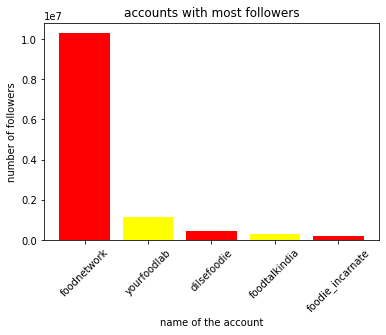

In [44]:
plt.bar(acc_followers.keys() , acc_followers.values() ,color =['red','yellow'])
plt.xlabel('name of the account')
plt.ylabel('number of followers')
plt.title("accounts with most followers")
plt.xticks(rotation=45)
plt.show()

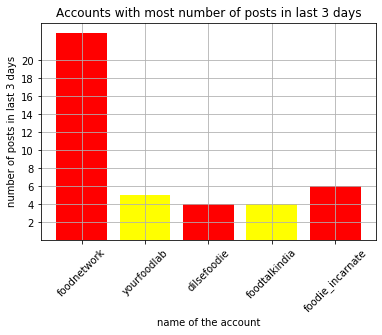

In [45]:
plt.bar(acc_post.keys() , acc_post.values() ,color =['red','yellow'])
plt.xlabel('name of the account')
plt.ylabel('number of posts in last 3 days')
plt.title("Accounts with most number of posts in last 3 days")
plt.yticks(np.arange(2,21,2))
plt.xticks(rotation=45)
plt.grid('on')
plt.show()

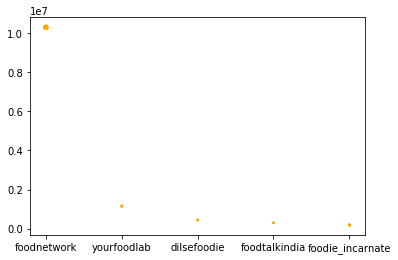

In [46]:
plt.scatter(acc_post.keys() , acc_followers.values() , s = list(acc_post.values()) , color = 'orange')
plt.show()

# Your friend also needs a list of hashtags that he should use in his posts.

### Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [47]:
def get_captions(mk_top):
    c = [] ##list will hold sraped data from top 10 posts of5 handles
    for j in range(5):
        acc = mk_top[j][0]  ##open top 5 accounts
        open_profile(acc)
        time.sleep(2)
        driver.execute_script('window.scrollBy(0,100);')  #scroll down for first post
        wait = WebDriverWait(driver , 10)   
        first = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_9AhH0')))  #wait for first post
        first.click()  #click on first post
        for m in range(10):
    #         get caption of post 
            ans = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/div/li/div/div/div[2]/span')))
    #         converet to html
            html = ans.get_attribute('innerHTML')
            data = BeautifulSoup(html)
            caption = data.text
    #         append captioin to list c
            c.append(caption)
            time.sleep(1)
    #         click on next post
            ans  = driver.find_element_by_link_text('Next')
            ans.click()
    #     driver.find_element_bu
        driver.execute_script('window.scrollBy(0,-100);')
    return c

In [48]:
c = get_captions(mk_top)
len(c)

50

In [49]:
c

['Tag your favorite dance partner! 💃🕺 @chefanneburrell & @tylerflorence host an all-new #WorstCooks Celebrity Edition > Sunday 9|8c',
 'File these pickles under the "Easy Cooking-at-Home Project" category! ✅✅. . .Catch @KatieLeeKitchen on #TheKitchen, Saturdays @ 11a|10c!. . .Save the recipe for Homemade Pickles on the @FoodNetworkKitchen app.',
 "Class of the Day: Porchetta with @ChefSymon🍴The intense flavor and crispy exterior of Chef Symon's porchetta will have your family coming back for seconds and thirds! 😋 He shares the recipe and technique in his class on the @FoodNetworkKitchen app. #WeCook",
 'Chocolate Stout Torta (with @giadadelaurentiis)Craving something chocolatey? Giada’s Chocolate Stout Torta is an Irish-Italian match made in heaven! #WeCook Save the recipe on your @FoodNetworkKitchen app.',
 "What's your go-to comfort food these days? The all-star guests at #QuestlovesPotluck are sharing their faves! Don't miss @questlovesfood @evalongoria @mspattilabelle @zooeydeschan

In [50]:
captions = c.copy()

### Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [51]:
# to seperate hastags in captions
# in some captions hastags are mentioned without any space therefore we replace it
for i in range(len(captions)):
    captions[i] = captions[i].replace('#',' #')
each_word =[]
for i in range(len(captions)):
    temp_list = captions[i].split(' ')
    for word in temp_list:
        if word != '':
            each_word.append(word)

In [52]:
each_word = np.array(each_word)
each_word = np.unique(each_word ,return_counts = True)
print("frequecy of each word is :")
for i in range(len(each_word[0])):
    print(each_word[0][i] ,each_word[1][i])

frequecy of each word is :
! 1
!!Will 1
!!Zindagi 1
!?In 1
!Do 1
!United 1
"Easy 1
#BeatBobbyFlay 1
#Food 1
#Foodieincarnate 3
#McDelivery 1
#McDonalds 1
#McDonaldsinIndia 1
#MuttonKorma 1
#OrderSafelyDon’t 1
#QuarantineFoodDelivery 1
#QuestlovesPotluck 1
#RestaurantImpossible 1
#StayHome 1
#StayHomeStaySafe 1
#StaySafe 1
#TheKitchen, 1
#WeCook 3
#WithMe 1
#WorstCooks 2
#asmr 1
#asmrfood 1
#bamboo 1
#biryani 1
#chickenkorma 1
#dal 1
#dilsefoodie 10
#eidmubarak 2
#food 3
#foodie 6
#foodieincarnate 6
#foodiesofinstagram 2
#frankie 2
#frankielove 1
#frenchtoast 1
#guitar 1
#homemade 1
#howtomakepaneer 1
#imlovinit 1
#indian 1
#indiancuisine 4
#indianfood 1
#instagram 1
#kheerpuda 1
#lockdown 1
#mumbaifoodie 1
#mumbaistreetfood 1
#muttoncurry 1
#muttonkorma 1
#mylockdownburger. Five 1
#mylockdownburger▪Follow 1
#nagpur 1
#odisha 2
#paneer 1
#pizza 2
#pizzalover 1
#puri 1
#recipe 3
#recipes 2
#samosa 1
#sanjyotkeer 6
#stayhome 4
#staysafe 4
#streetfood 2
#sweet 2
#tikki 1
#virtualiftaar 1
#

### Create a csv file with two columns : the word and its frequency

In [53]:
df = pd.DataFrame({'word':each_word[0],
                  'frequency': each_word[1]}
                 )

In [54]:
df.head()

,word,frequency
0,!,1
1,!!Will,1
2,!!Zindagi,1
3,!?In,1
4,!Do,1


In [55]:
df.to_csv('frequency_instabot_2.csv', sep=',')

### Now, find the hashtags that were most popular among these bloggers

In [56]:
popular_hashtags = {}
for i in range(len(each_word[0])):
    word = each_word[0][i]
    count = each_word[1][i]
    if word[0] == '#':
        popular_hashtags[word] =count

In [57]:
popular_hashtags = sorted(popular_hashtags.items(), key=lambda x: x[1], reverse=True)
print("Most used hastags:")
hashtag = []
count =[]
for i in range(len(popular_hashtags)):
    print(popular_hashtags[i][0] ,popular_hashtags[i][1])
    hashtag.append(popular_hashtags[i][0])
    count.append(popular_hashtags[i][1])

Most used hastags:
#dilsefoodie 10
#foodie 6
#foodieincarnate 6
#sanjyotkeer 6
#indiancuisine 4
#stayhome 4
#staysafe 4
#Foodieincarnate 3
#WeCook 3
#food 3
#recipe 3
#WorstCooks 2
#eidmubarak 2
#foodiesofinstagram 2
#frankie 2
#odisha 2
#pizza 2
#recipes 2
#streetfood 2
#sweet 2
#BeatBobbyFlay 1
#Food 1
#McDelivery 1
#McDonalds 1
#McDonaldsinIndia 1
#MuttonKorma 1
#OrderSafelyDon’t 1
#QuarantineFoodDelivery 1
#QuestlovesPotluck 1
#RestaurantImpossible 1
#StayHome 1
#StayHomeStaySafe 1
#StaySafe 1
#TheKitchen, 1
#WithMe 1
#asmr 1
#asmrfood 1
#bamboo 1
#biryani 1
#chickenkorma 1
#dal 1
#frankielove 1
#frenchtoast 1
#guitar 1
#homemade 1
#howtomakepaneer 1
#imlovinit 1
#indian 1
#indianfood 1
#instagram 1
#kheerpuda 1
#lockdown 1
#mumbaifoodie 1
#mumbaistreetfood 1
#muttoncurry 1
#muttonkorma 1
#mylockdownburger. Five 1
#mylockdownburger▪Follow 1
#nagpur 1
#paneer 1
#pizzalover 1
#puri 1
#samosa 1
#tikki 1
#virtualiftaar 1
#yummy 1


### Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

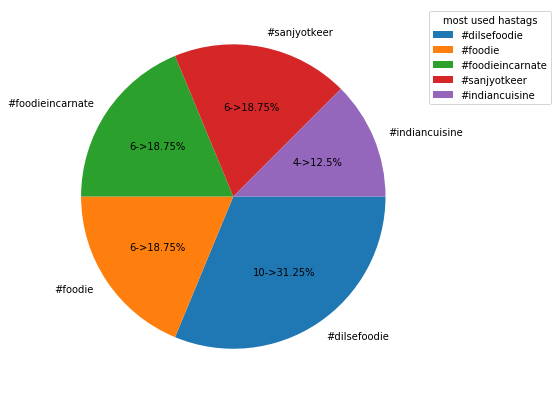

In [73]:
def absolute_value(val):
    a  = int(val/100.*sum(count[0:5]))
    temp = str(a) + '->'+str(val) +'%'
    return temp
plt.figure(figsize=(7,7))
plt.pie(count[0:5] ,labels = hashtag[0:5],counterclock=False,autopct=absolute_value)
plt.legend(title="most used hastags",loc="upper left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# You need to also calculate average followers : likes ratio for the obtained handles.

### Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [87]:
def get_total_likes(mk_top):
    # like_array will hold like values for posts
    like_array = []
    for j in range(5):
        acc = mk_top[j][0]  ##open top 5 accounts
        open_profile(acc)
        time.sleep(2)
        driver.execute_script('window.scrollBy(0,100);')
        wait = WebDriverWait(driver , 10)   
        first = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_9AhH0')))  #wait for first post
    #     click on first post
        first.click() 

        like_num=[]
        for i in range(10):
            try:
    #             check if post is a video or igtv
                time.sleep(2)
    #       click on views 
                
                views = WebDriverWait(driver , 4).until(EC.presence_of_element_located((By.CLASS_NAME,'vcOH2')))
#                 views = driver.find_element_by_class_name('vcOH2')
                views.click()
    #         after clicking on views number of likes will appear
                ans_vid = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/div[4]/span').text
    #          append number of likes to list
                like_num.append(ans_vid)
    #     click anywhere on screen to hide numer of likes
                driver.find_element_by_class_name('QhbhU').click()
            except (TimeoutException , NoSuchElementException):
    #             if post is a image
                ans_photo = wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/button/span')))
    #            append number of likes in a list
                like_num.append(ans_photo.text)
            time.sleep(1)
    #         click on next button
            ans  = driver.find_element_by_link_text('Next')
            ans.click()
        driver.execute_script('window.scrollBy(0,-100);')
        like_array.append(like_num)
    return like_array

In [88]:
like_array = get_total_likes(mk_top)

In [98]:
like_array

[['1,347',
  '2,008',
  '4,401',
  '4,928',
  '8,268',
  '4,076',
  '9,650',
  '10,837',
  '10,455',
  '6,617'],
 ['7,423',
  '8,318',
  '19,886',
  '20,053',
  '7,459',
  '32,493',
  '46,967',
  '24,205',
  '23,363',
  '9,500'],
 ['4',
  '7,701',
  '5,539',
  '11,264',
  '6,704',
  '9,015',
  '6,857',
  '7,428',
  '3,624',
  '13,851'],
 ['339', '515', '656', '127', '1,642', '230', '180', '446', '968', '722'],
 ['3,189',
  '2,573',
  '5,821',
  '5,419',
  '4,735',
  '2,308',
  '11,010',
  '4,908',
  '6,261',
  '24,525']]

In [99]:
# convert string to integer
lk = like_array.copy()
for j in range(len(lk)):
    for i in range(len(lk[j])):
        lk[j][i] = int(lk[j][i].replace(',',''))
#         lk[0][i] = int(lk[0][i])/
print("like for 10 posts in each of 5 accounts are")
for i in lk:
    print("likes on account are",i)

like for 10 posts in each of 5 accounts are
likes on account are [1347, 2008, 4401, 4928, 8268, 4076, 9650, 10837, 10455, 6617]
likes on account are [7423, 8318, 19886, 20053, 7459, 32493, 46967, 24205, 23363, 9500]
likes on account are [4, 7701, 5539, 11264, 6704, 9015, 6857, 7428, 3624, 13851]
likes on account are [339, 515, 656, 127, 1642, 230, 180, 446, 968, 722]
likes on account are [3189, 2573, 5821, 5419, 4735, 2308, 11010, 4908, 6261, 24525]


### Calculate the average likes for a handle

In [100]:
avg_likes =[]
for i in range(len(lk)):
    avg_likes.append(sum(lk[i])/len(lk[i]))

In [101]:
avg_likes

[6258.7, 19966.7, 7198.7, 582.5, 7074.9]

### Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [102]:
c=0
ratio_array =[]
for i in acc_followers:
    print("follower:like ratio for",i)
    print(acc_followers[i]/avg_likes[c])
    ratio_array.append(acc_followers[i]/avg_likes[c])
    c = c+1

follower:like ratio for foodnetwork
1646.283892821193
follower:like ratio for yourfoodlab
57.606114180109884
follower:like ratio for dilsefoodie
61.70391876311001
follower:like ratio for foodtalkindia
507.050643776824
follower:like ratio for foodie_incarnate
26.02199324372076


### Create a bar graph to depict the above obtained information

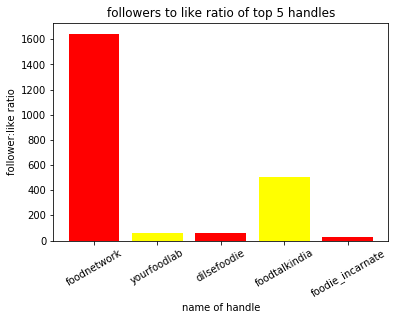

In [103]:
plt.bar(acc_followers.keys() ,ratio_array ,color =['red' ,'yellow'])
plt.xticks(rotation=30)
plt.xlabel("name of handle")
plt.ylabel("follower:like ratio")
plt.title("followers to like ratio of top 5 handles")
plt.show()

In [104]:
driver.close()